In [63]:
import pandas as pd
import matplotlib.pyplot as pl
import sqlite3

Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [3]:
#stationbikes + yelpresto using merge to show bikestations and nearby resto
#importing resto excel
restos = pd.read_excel('resto.xlsx', sheet_name= 'resto', engine = 'openpyxl')
#I add the city so that I use it in merging
restos['city'] = 'London'

In [4]:
#importing stationbikes excel
bikestations = pd.read_excel('stations.xlsx', sheet_name= 'stations', engine = 'openpyxl')
bikestations['city'] = 'London'

In [5]:
#merging both resto and bikestations on 'id'
londonstations= pd.merge(restos, bikestations, on='city', how='outer')

# I only keep columns that carry information in order to clean the dataframe some more.
#(resto_name, price, review_count, rating, city, empty_slots, free_bikes, latitude, longitude, name, timestamp)
columns_to_keep = ['resto_name', 'price', 'review_count', 'rating', 'city', 
                   'empty_slots', 'free_bikes', 'latitude', 'longitude', 'name', 'timestamp']

# Drop columns that are not in the list of columns to keep
londonstations = londonstations[columns_to_keep]

# Print the updated DataFrame
londonstations

,resto_name,price,review_count,rating,city,empty_slots,free_bikes,latitude,longitude,name,timestamp
0,The Ledbury,££££,173,4.6,London,5,8,51.529163,-0.109971,"001023 - River Street , Clerkenwell",2024-05-08T03:25:16.473000Z
1,The Ledbury,££££,173,4.6,London,25,12,51.499607,-0.197574,"001018 - Phillimore Gardens, Kensington",2024-05-08T03:25:16.485000Z
2,The Ledbury,££££,173,4.6,London,11,7,51.505974,-0.092754,"001024 - Park Street, Bankside",2024-05-08T03:25:16.497000Z
3,The Ledbury,££££,173,4.6,London,22,1,51.523951,-0.122502,"001022 - Brunswick Square, Bloomsbury",2024-05-08T03:25:16.498000Z
4,The Ledbury,££££,173,4.6,London,40,7,51.521681,-0.130432,"000980 - Malet Street, Bloomsbury",2024-05-08T03:25:16.499000Z
...,...,...,...,...,...,...,...,...,...,...,...
7895,Petrus,££££,135,4.4,London,6,18,51.481021,-0.209973,"200098 - Aintree Street, Fulham",2024-05-08T03:25:18.314000Z
7896,Petrus,££££,135,4.4,London,10,6,51.516518,-0.164394,"001112 - Nutford Place, Marylebone",2024-05-08T03:25:17.020000Z
7897,Petrus,££££,135,4.4,London,18,0,51.510048,-0.138846,"001197 - Sackville Street, Mayfair",2024-05-08T03:25:17.332000Z
7898,Petrus,££££,135,4.4,London,1,32,51.536425,-0.054162,"300011 - Victoria Park Road, Hackney Central",2024-05-08T03:25:18.537000Z


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [37]:
#contex: I want to see the top ten nearby recommendable restaurants and nearby slots and: empty_slots, free_bikes, name, rating
#I will edit the londonstations dataframe only to include the needed columns. This helps me view this dataframe better
needed_columns = ['resto_name', 'review_count', 'rating',
                   'empty_slots', 'free_bikes']
stations_v = londonstations[needed_columns]
stations_view= stations_v.rename(columns={'name': 'slot_address'})

stations_view


,resto_name,review_count,rating,empty_slots,free_bikes
0,The Ledbury,173,4.6,5,8
1,The Ledbury,173,4.6,25,12
2,The Ledbury,173,4.6,11,7
3,The Ledbury,173,4.6,22,1
4,The Ledbury,173,4.6,40,7
...,...,...,...,...,...
7895,Petrus,135,4.4,6,18
7896,Petrus,135,4.4,10,6
7897,Petrus,135,4.4,18,0
7898,Petrus,135,4.4,1,32


In [38]:
#consider dataframe named xxx made of a table with various columns (resto_name, review_count, rating,
# empty_slots, free_bikes). group this by resto names s of each restaurant

In [51]:
# Grouping by restaurant names and aggregating data
unique_restos= stations_view.groupby('resto_name').agg({
    'review_count': 'sum',
    'rating': 'mean',
    'empty_slots': 'sum',
    'free_bikes': 'sum'
}).reset_index()

unique_restos




,resto_name,review_count,rating,empty_slots,free_bikes
0,Blacklock,118500,4.60,10030,9930
1,Burger & Lobster,90060,4.50,10030,9930
2,Dinner by Heston Blumenthal,246480,4.40,10030,9930
3,Dishoom,2595150,4.55,20060,19860
4,Flat Iron,379200,4.50,10030,9930
5,Hawksmoor Seven Dials,314420,4.40,10030,9930
6,Petrus,106650,4.40,10030,9930
7,The Ledbury,136670,4.60,10030,9930
8,The Mayfair Chippy,402900,4.50,10030,9930


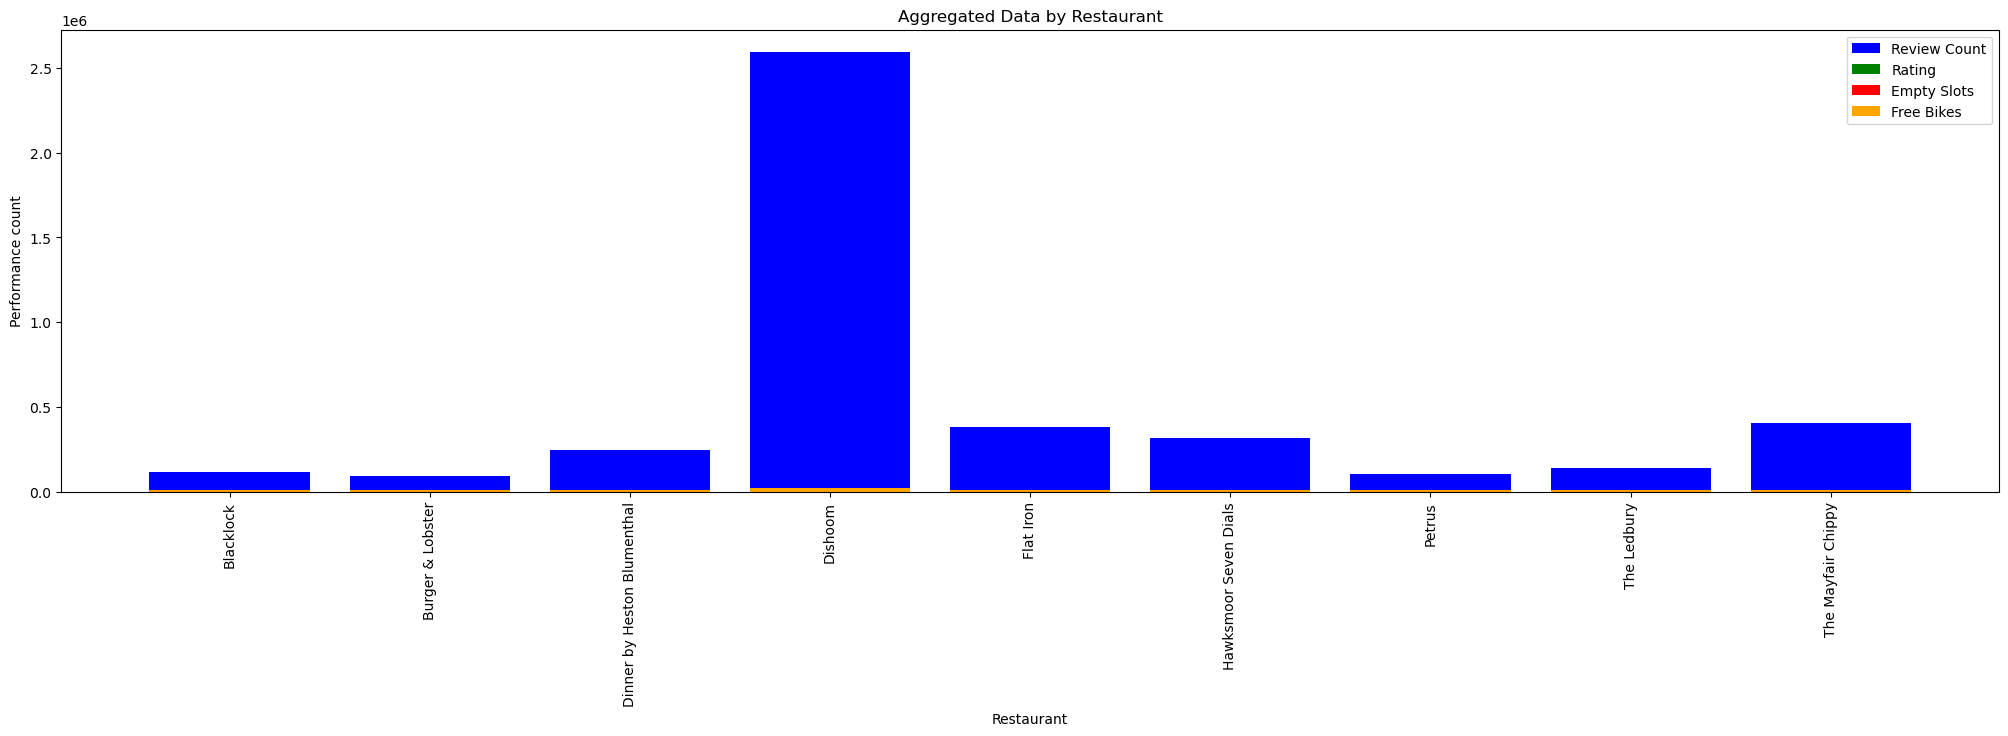

In [62]:
# Plotting
pl.figure(figsize=(25, 6))

# Define x-axis values
x = unique_restos['resto_name']
# Plot review counts
pl.bar(x, unique_restos['review_count'], color='blue', label='Review Count')
# Plot ratings
pl.bar(x, unique_restos['rating'], color='green', label='Rating')

# Plot empty slots
pl.bar(x, unique_restos['empty_slots'], color='red', label='Empty Slots')

# Plot free bikes
pl.bar(x, unique_restos['free_bikes'], color='orange', label='Free Bikes')

# Adding labels and title
pl.xlabel('Restaurant')
pl.ylabel('Performance count')
pl.title('Aggregated Data by Restaurant')
pl.xticks(rotation=90)
pl.legend()



# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [70]:
#A sqlite connection
db_conn = sqlite3.connect('bikes_and_poi.db')

# Store 2 joined df in the db: londonstations, stations_view
londonstations.to_sql('stations_table', db_conn, if_exists='replace', index=False)
# Store dataframe x in the database
stations_view.to_sql('restos_table', db_conn, if_exists='replace', index=False)

db_conn.close()


Look at the data before and after the join to validate your data.